<a href="https://colab.research.google.com/github/ruslanmv/Neural-Networks-from-Scratch/blob/master/5_Tunning_and_Training_model_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing library
# Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

In [2]:
#Helper functions about mmorpg-ai project
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import os

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2


In [3]:
#We define the parameters
width= 480
height= 270
ncolors=3
#Normalization Parameter
Norma        = 29/1000
#Paramters                          Operation 
filters1     =  roundeven(96*Norma)   #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
activation9  =  roundeven(4096*Norma)  #9
activation10 =  roundeven(4096*Norma)  #10
outputs11    =  int(1000*Norma)   #11
dropout13=0.5
dropout15=0.5
learning_rate17=0.001

In [4]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
#We load the datasets to work
import os
user = "ruslanmv"
repo = "Neural-Networks-from-Scratch"
# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}
!git clone https://github.com/{user}/{repo}.git

Cloning into 'Neural-Networks-from-Scratch'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 196 (delta 71), reused 36 (delta 16), pack-reused 84
Receiving objects: 100% (196/196), 318.41 MiB | 33.03 MiB/s, done.
Resolving deltas: 100% (96/96), done.
Checking out files: 100% (55/55), done.


In [6]:
import os
os.chdir('Neural-Networks-from-Scratch')

In [7]:
!ls /content/Neural-Networks-from-Scratch/data


dfx-0.pkl  dfx-1.pkl  dfx-2.pkl  dfy-0.pkl  dfy-1.pkl  dfy-2.pkl


In [8]:
# Function to create model MmoNet
def create_model(optimizer='adam',learn_rate=0.1, momentum=0):
    # create model
    MmoNet = Sequential()
    MmoNet.add(Conv2D(filters=filters1, input_shape=(height, width, ncolors), kernel_size=(11,11), strides=(stride1,stride1), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel2,kernel2), strides=(stride2,stride2), padding='same'))
    MmoNet.add(Conv2D(filters=filters3, kernel_size=(kernel3, kernel3), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel4,kernel4), strides=(stride4,stride4), padding='same'))
    #3rd Convolutional Layer
    MmoNet.add(Conv2D(filters=filters5, kernel_size=(kernel5,kernel5), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #4th Convolutional Layer
    MmoNet.add(Conv2D(filters=filters6, kernel_size=( kernel6, kernel6), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #5th Convolutional Layer
    MmoNet.add(Conv2D(filters=filters7, kernel_size=(kernel7,kernel7),  padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel8,kernel8), strides=(stride8,stride8), padding='same'))
    #Passing it to a Fully Connected layer
    MmoNet.add(Flatten())
    # 1st Fully Connected Layer
    MmoNet.add(Dense(activation9, input_shape=(270, 480, 3,)))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    MmoNet.add(Dropout(dropout13))
    #2nd Fully Connected Layer
    MmoNet.add(Dense(activation10))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #Add Dropout
    MmoNet.add(Dropout(dropout15))
    #3rd Fully Connected Layer
    MmoNet.add(Dense(1000))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #Add Dropout
    MmoNet.add(Dropout(dropout15))
    #Output Layer
    MmoNet.add(Dense(outputs11))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('softmax'))

    # Compile model
    optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
    

    MmoNet.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return MmoNet

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 120, 4)        1456      
                                                                 
 batch_normalization (BatchN  (None, 68, 120, 4)       16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 68, 120, 4)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 60, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 60, 8)         808       
                                                                 
 batch_normalization_1 (Batc  (None, 34, 60, 8)        3

In [11]:
# load dataset
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,width,height,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,width,height,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

In [12]:
X_image.shape



(200, 270, 480, 3)

In [13]:
type(X_image)

numpy.ndarray

In [14]:
Y_input=np.array(Y)

In [15]:
Y_input.shape

(200, 29)

In [16]:
test_image.shape

(50, 270, 480, 3)

In [17]:
test_input=np.array(test_y)

In [18]:
test_input.shape

(50, 29)

In [19]:
X_train = X_image
y_train = Y_input
X_test=  test_image
y_test = test_input

In [20]:

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=80)
#hist = model.fit(X_image, Y_input, validation_data=(test_image, test_input), epochs=100, batch_size=80)

Epoch 1/100
3/3 [==============================] - 5s 511ms/step - loss: 0.8038 - accuracy: 0.0300 - val_loss: 0.7839 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 180ms/step - loss: 0.8012 - accuracy: 0.0300 - val_loss: 0.7196 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 161ms/step - loss: 0.7980 - accuracy: 0.0500 - val_loss: 0.7313 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 161ms/step - loss: 0.7950 - accuracy: 0.0350 - val_loss: 0.7226 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 164ms/step - loss: 0.7913 - accuracy: 0.0500 - val_loss: 0.7099 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 160ms/step - loss: 0.7891 - accuracy: 0.0450 - val_loss: 0.6964 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 165ms/step - loss: 0.7855 - accuracy: 0.0400 - val_loss: 0.6941 - val_accura

[]

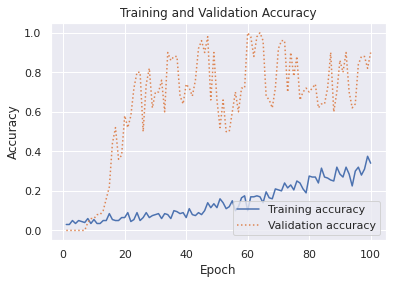

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [22]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test) > 0.5
#mat = confusion_matrix(y_test, y_predicted)
mat = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_predicted).argmax(axis=1))
labels_input=list(y_training_data.columns)
labels = labels_input

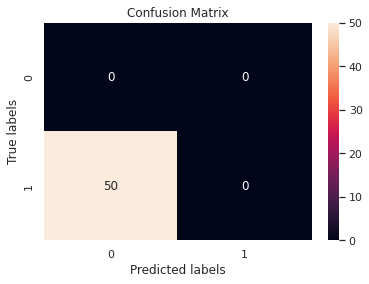

In [23]:
ax= plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

Text(89.18, 0.5, 'Actual label')

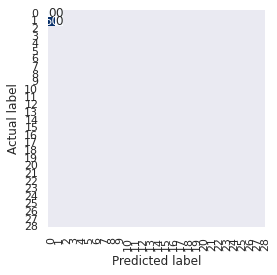

In [24]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [25]:
!pip install keras-tuner -q

In [26]:
x_train = X_image
x_val=  test_image

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


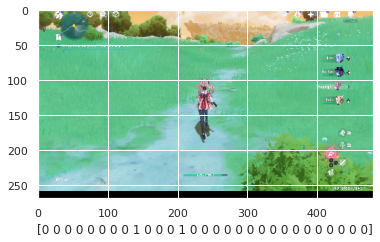

In [27]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='binary')
plt.xlabel(y_train[0])
plt.show()

In [28]:
y_train = np.array(Y)
y_val = np.array(test_y)

In [29]:
import keras_tuner
import tensorflow as tf

In [30]:
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        """Builds a convolutional model."""
        # create model
        input_shape =(270, 480, 3)
        optimizer='Adam'
        learn_rate=0.1
        momentum=0

        # create model
        MmoNet = Sequential()
        MmoNet.add(Conv2D(filters=filters1, input_shape=(height, width, ncolors), kernel_size=(11,11), strides=(stride1,stride1), padding='same'))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        MmoNet.add(MaxPooling2D(pool_size=(kernel2,kernel2), strides=(stride2,stride2), padding='same'))
        MmoNet.add(Conv2D(filters=filters3, kernel_size=(kernel3, kernel3), padding='same'))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        MmoNet.add(MaxPooling2D(pool_size=(kernel4,kernel4), strides=(stride4,stride4), padding='same'))
        #3rd Convolutional Layer
        MmoNet.add(Conv2D(filters=filters5, kernel_size=(kernel5,kernel5), padding='same'))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        #4th Convolutional Layer
        MmoNet.add(Conv2D(filters=filters6, kernel_size=( kernel6, kernel6), padding='same'))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        #5th Convolutional Layer
        MmoNet.add(Conv2D(filters=filters7, kernel_size=(kernel7,kernel7),  padding='same'))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        MmoNet.add(MaxPooling2D(pool_size=(kernel8,kernel8), strides=(stride8,stride8), padding='same'))
        #Passing it to a Fully Connected layer
        MmoNet.add(Flatten())
        # 1st Fully Connected Layer
        MmoNet.add(Dense(hp.Choice('units1', [8, 16, 32,64,128,256,512,1024]), input_shape=(270, 480, 3,)))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        # Add Dropout to prevent overfitting
        MmoNet.add(Dropout(hp.Choice('Dropout1', [0.25,0.5,0.75])))
        #2nd Fully Connected Layer
        MmoNet.add(Dense(hp.Choice('units2', [8, 16, 32,64,128,256,512,1024])))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        #Add Dropout
        MmoNet.add(Dropout(hp.Choice('Dropout2', [0.25,0.5,0.75])))
        #3rd Fully Connected Layer
        MmoNet.add(Dense(hp.Choice('units3', [8, 16, 32,64,128,256,512,1024])))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('relu'))
        #Add Dropout
        MmoNet.add(Dropout(hp.Choice('Dropout3', [0.25,0.5,0.75])))
        #Output Layer
        MmoNet.add(Dense(outputs11))
        MmoNet.add(BatchNormalization())
        MmoNet.add(Activation('softmax'))

        # Compile model
        optimizer = SGD(learning_rate=learn_rate, momentum=momentum)
        MmoNet.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return MmoNet


    def fit(self, hp, model, x, y, validation_data, callbacks=None, **kwargs):
        # Convert the datasets to tf.data.Dataset.
        batch_size = hp.Int("batch_size", 32, 128, step=32, default=64)
        train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(
            batch_size
        )
        validation_data = tf.data.Dataset.from_tensor_slices(validation_data).batch(
            batch_size
        )

        # Define the optimizer.
        optimizer = tf.keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log", default=1e-3)
        )
        loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

        # The metric to track validation loss.
        epoch_loss_metric = tf.keras.metrics.Mean()

        # Function to run the train step.
        @tf.function
        def run_train_step(images, labels):
            with tf.GradientTape() as tape:
                logits = model(images)
                loss = loss_fn(labels, logits)
                # Add any regularization losses.
                if model.losses:
                    loss += tf.math.add_n(model.losses)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Function to run the validation step.
        @tf.function
        def run_val_step(images, labels):
            logits = model(images)
            loss = loss_fn(labels, logits)
            # Update the metric.
            epoch_loss_metric.update_state(loss)

        # Assign the model to the callbacks.
        for callback in callbacks:
            callback.model = model

        # Record the best validation loss value
        best_epoch_loss = float("inf")

        # The custom training loop.
        for epoch in range(2):
            print(f"Epoch: {epoch}")

            # Iterate the training data to run the training step.
            for images, labels in train_ds:
                run_train_step(images, labels)

            # Iterate the validation data to run the validation step.
            for images, labels in validation_data:
                run_val_step(images, labels)

            # Calling the callbacks after epoch.
            epoch_loss = float(epoch_loss_metric.result().numpy())
            for callback in callbacks:
                # The "my_metric" is the objective passed to the tuner.
                callback.on_epoch_end(epoch, logs={"my_metric": epoch_loss})
            epoch_loss_metric.reset_states()

            print(f"Epoch loss: {epoch_loss}")
            best_epoch_loss = min(best_epoch_loss, epoch_loss)

        # Return the evaluation metric value.
        return best_epoch_loss


In [31]:
tuner = keras_tuner.RandomSearch(
    objective=keras_tuner.Objective("my_metric", "min"),
    max_trials=15,
    hypermodel=MyHyperModel(),
    directory="results",
    project_name="custom_training",
    overwrite=True,
)

In [32]:
tuner.search(x=x_train, y=y_train, validation_data=(x_val, y_val))

Trial 10 Complete [00h 00m 03s]
my_metric: 760926.0625

Best my_metric So Far: 2.4517710208892822
Total elapsed time: 00h 00m 52s


In [33]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'units1': 128, 'Dropout1': 0.5, 'units2': 64, 'Dropout2': 0.25, 'units3': 64, 'Dropout3': 0.75, 'batch_size': 96, 'learning_rate': 0.0006593135819886603}


In [34]:
#tuner.search(x=x_train, y=y_train, epochs=5,validation_data=(x_val, y_val))
#tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
# Will stop training if the "val_loss" hasn't improved in 3 epochs.
tuner.search(x_train, y_train, epochs=30, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)],validation_data=(x_val, y_val))




In [35]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'units1': 128, 'Dropout1': 0.5, 'units2': 64, 'Dropout2': 0.25, 'units3': 64, 'Dropout3': 0.75, 'batch_size': 96, 'learning_rate': 0.0006593135819886603}


In [36]:
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 120, 4)        1456      
                                                                 
 batch_normalization (BatchN  (None, 68, 120, 4)       16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 68, 120, 4)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 60, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 60, 8)         808       
                                                                 
 batch_normalization_1 (Batc  (None, 34, 60, 8)        3

In [37]:
best_hist = best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=300, batch_size=96)

Epoch 1/400
3/3 [==============================] - 3s 370ms/step - loss: 0.8015 - accuracy: 0.0350 - val_loss: 1.0077 - val_accuracy: 0.9600
Epoch 2/400
3/3 [==============================] - 1s 220ms/step - loss: 0.7967 - accuracy: 0.0250 - val_loss: 0.7730 - val_accuracy: 0.8800
Epoch 3/400
3/3 [==============================] - 1s 206ms/step - loss: 0.7933 - accuracy: 0.0300 - val_loss: 0.7449 - val_accuracy: 0.7000
Epoch 4/400
3/3 [==============================] - 1s 243ms/step - loss: 0.7875 - accuracy: 0.0200 - val_loss: 0.6954 - val_accuracy: 0.3400
Epoch 5/400
3/3 [==============================] - 1s 251ms/step - loss: 0.7815 - accuracy: 0.0300 - val_loss: 0.6626 - val_accuracy: 0.1800
Epoch 6/400
3/3 [==============================] - 1s 231ms/step - loss: 0.7769 - accuracy: 0.0150 - val_loss: 0.6449 - val_accuracy: 0.0200
Epoch 7/400
3/3 [==============================] - 1s 258ms/step - loss: 0.7701 - accuracy: 0.0200 - val_loss: 0.6513 - val_accuracy: 0.0200
Epoch 8/400
3

[]

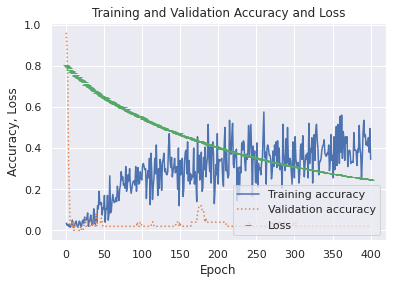

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = best_hist.history['accuracy']
val = best_hist.history['val_accuracy']
lossa = best_hist.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, lossa, '_', label='Loss')
plt.title('Training and Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy, Loss')
plt.legend(loc='lower right')
plt.plot()

[]

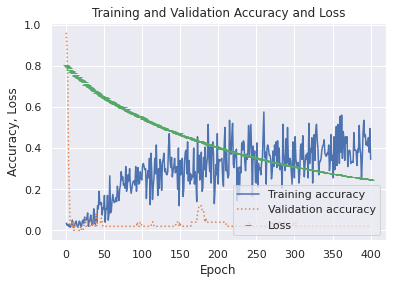

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = best_hist.history['accuracy']
val = best_hist.history['val_accuracy']
lossa = best_hist.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.plot(epochs, lossa, '_', label='Loss')
plt.title('Training and Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy, Loss')
plt.legend(loc='lower right')
plt.plot()

In [40]:
from sklearn.metrics import confusion_matrix
y_predicted = best_model.predict(x_val) > 0.5
#mat = confusion_matrix(y_test, y_predicted)
mat = confusion_matrix(np.asarray(y_val).argmax(axis=1), np.asarray(y_predicted).argmax(axis=1))
labels_input=list(y_training_data.columns)
labels = labels_input

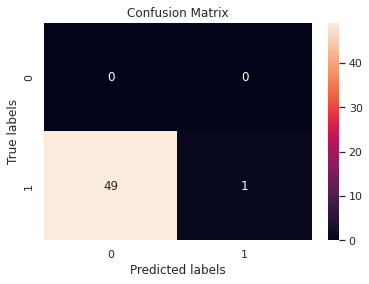

In [41]:
ax= plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

Text(89.18, 0.5, 'Actual label')

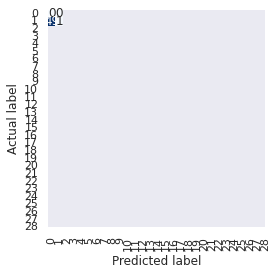

In [42]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')